# Stock Analysis & Portfolio Optimization

This project analyzes historical stock data to evaluate risk, return,
and optimal portfolio allocation using modern portfolio theory.

In [39]:
# Dynamically find the repository/project root (no hard-coded user path)
import sys
from pathlib import Path

def find_project_root(marker_names=("requirements.txt", ".git")):
    cur = Path.cwd().resolve()
    for p in [cur] + list(cur.parents):
        for marker in marker_names:
            if (p / marker).exists():
                return p
    raise FileNotFoundError("Project root not found (looked for requirements.txt or .git)")

project_root = find_project_root()

# Ensure src package can be imported using a relative project root
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print("Using project_root:", project_root)
# Now imports like `from src.analytics import ...` should work without hard-coded usernames or absolute paths.

Using project_root: /Users/camdenkantaparn/Downloads/VSCode/stock-portfolio-optimization


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.analytics import calculate_returns, calculate_volatility, calculate_correlation
from src.optimization import optimize_portfolio, portfolio_metrics
from src.data_loader import fetch_stock_data

In [41]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM']
data = fetch_stock_data(tickers)
data.head()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,JPM,MSFT
Date,,,,,
2023-01-03,123.211189,85.820000,88.451683,125.492226,233.985657
2023-01-04,124.482040,85.139999,87.419495,126.662476,223.750351
2023-01-05,123.161949,83.120003,85.553589,126.634407,217.118881
2023-01-06,127.693604,86.080002,86.685036,129.057617,219.677719
2023-01-09,128.215714,87.360001,87.359932,128.524292,221.816589


In [42]:
returns = calculate_returns(data)
volatility = calculate_volatility(returns)
correlations = calculate_correlation(returns) 

In [43]:
opt_weights = optimize_portfolio(returns)
opt_return, opt_vol, opt_sharpe = portfolio_metrics(opt_weights, returns)

In [ ]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, opt_weights):
    print(f"{ticker}: {weight:.2%}")

print(f"\nExpected Annual Portfolio Return: {opt_return:.2%}")
print(f"Volatility: {opt_vol:.2%}")
print(f"Sharpe Ratio: {opt_sharpe:.2f}")

Optimal Weights:
AAPL: 0.25%
MSFT: 8.12%
GOOGL: 15.29%
AMZN: 49.93%
JPM: 26.40%

Expected Portfolio Return: 35.54%
Volatility: 18.87%
Sharpe Ratio: 1.88


<Figure size 1200x600 with 0 Axes>

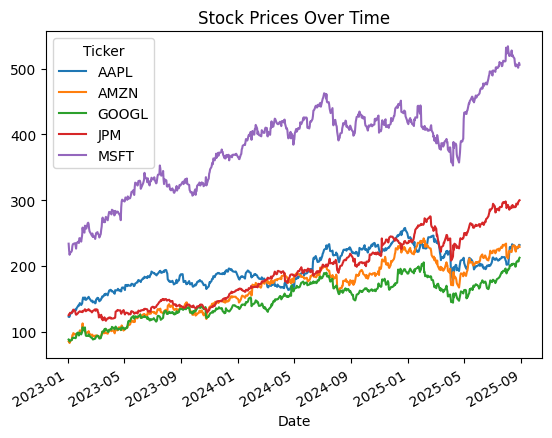

In [45]:
plt.figure(figsize=(12, 6))
data.plot(title="Stock Prices Over Time")
plt.savefig(project_root / "visuals/charts/stock_prices_over_time.png")
plt.show()

<Figure size 1200x600 with 0 Axes>

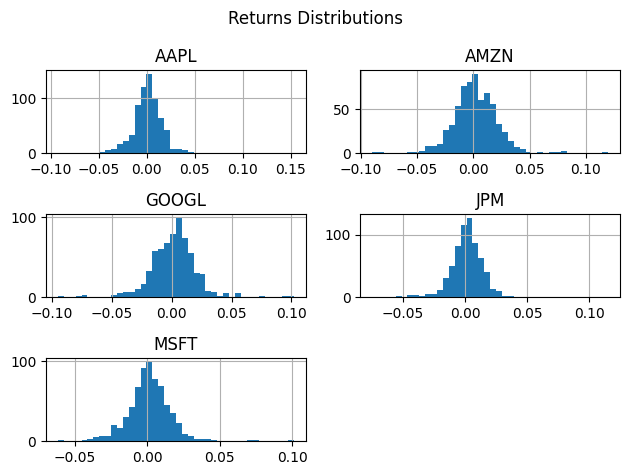

In [46]:
plt.figure(figsize=(12, 6))
returns.hist(bins=40)
plt.suptitle('Returns Distributions')
plt.tight_layout()
plt.savefig(project_root / "visuals/charts/returns_distributions.png")
plt.show()

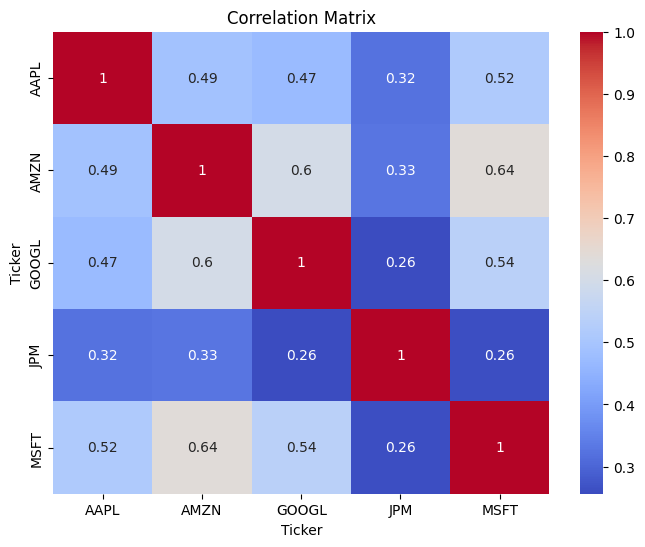

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig(project_root / "visuals/charts/correlation_matrix.png")
plt.show()

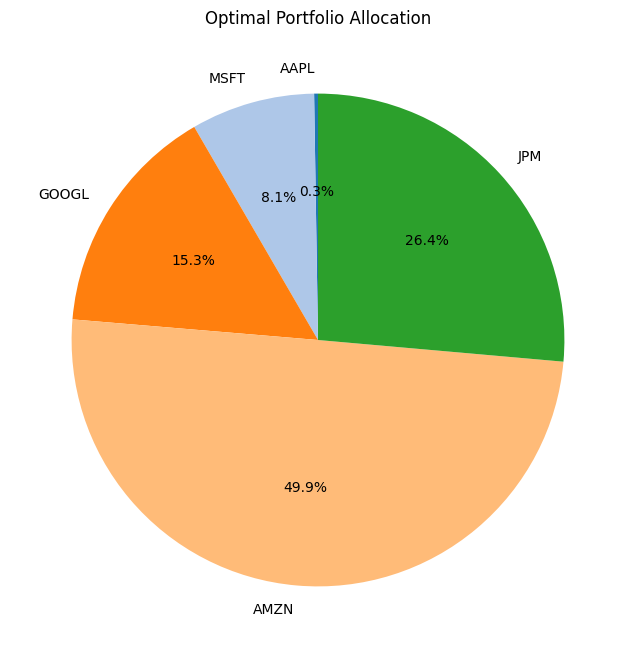

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(opt_weights, labels=tickers, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Optimal Portfolio Allocation")
plt.savefig(project_root / "visuals/charts/optimal_portfolio_allocation.png")
plt.show()

/var/folders/15/4b8vsjp96nq8q62h4rxjzqg40000gn/T/ipykernel_93862/506684708.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (stock_volatility[i], stock_returns[i]),


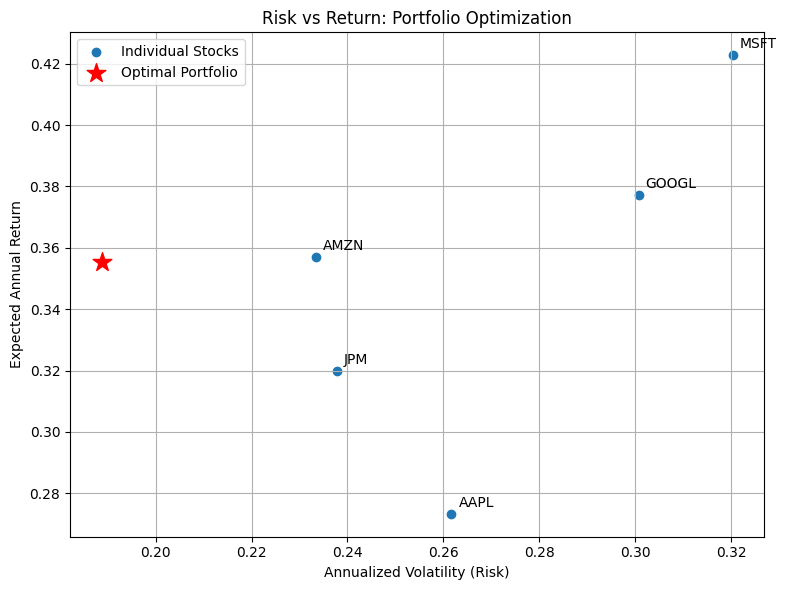

In [49]:
stock_returns = returns.mean() * 252
stock_volatility = returns.std() * np.sqrt(252)

plt.figure(figsize=(8,6))
plt.scatter(stock_volatility, stock_returns, label='Individual Stocks')

# Label each stock
for i, ticker in enumerate(tickers):
    plt.annotate(ticker, 
                 (stock_volatility[i], stock_returns[i]),
                 textcoords="offset points",
                 xytext=(5,5))

# Plot optimal portfolio
plt.scatter(opt_vol, opt_return, color='red', marker='*', s=200, label='Optimal Portfolio')

plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Expected Annual Return')
plt.title('Risk vs Return: Portfolio Optimization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(project_root / "visuals/charts/risk_return_scatter.png")
plt.show()